In [1]:
# predict probability that any given game will result in a regulation tie

In [2]:
import pandas as pd


In [3]:
# write final modeling data to excel
modeling_data = pd.read_excel(r'data/modeling_data.xlsx', header=0)

# drop odds cols
modeling_data = modeling_data.drop(['Odds_1', 'Odds_X','Odds_2'], axis=1)

# inspect
modeling_data.info()
modeling_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3405 entries, 0 to 3404
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              3405 non-null   datetime64[ns]
 1   Season                            3405 non-null   int64         
 2   Game_ID                           3405 non-null   object        
 3   Home_Team                         3405 non-null   object        
 4   Away_Team                         3405 non-null   object        
 5   Reg_Home_Win                      3405 non-null   bool          
 6   Reg_Away_Win                      3405 non-null   bool          
 7   Reg_Tie                           3405 non-null   bool          
 8   Month                             3405 non-null   object        
 9   Day_of_Week                       3405 non-null   object        
 10  Conf_Matchup                      3405 non-null 

,Date,Season,Game_ID,Home_Team,Away_Team,Reg_Home_Win,Reg_Away_Win,Reg_Tie,Month,Day_of_Week,...,prop_P1_Home_Goal_Diff_Away,prop_P2_Home_Goal_Diff_Away,prop_P3_Home_Goal_Diff_Away,prop_P1_Away_Goal_Diff_Away,prop_P2_Away_Goal_Diff_Away,prop_P3_Away_Goal_Diff_Away,prop_reg_home_goal_diff_Away,prop_reg_away_goal_diff_Away,avg_reg_home_goals_per_game_Away,avg_reg_away_goals_per_game_Away
0,2023-09-24,2023,2023-09-24-20:00|Anaheim Ducks vs Los Angeles ...,Anaheim Ducks,Los Angeles Kings,False,False,True,September,Sunday,...,inf,1.000000,2.00,0.00,1.000000,0.500000,0.583333,0.416667,3.50,2.5
1,2023-09-27,2023,2023-09-27-22:00|Anaheim Ducks vs San Jose Sharks,Anaheim Ducks,San Jose Sharks,True,False,False,September,Wednesday,...,2.000000,inf,1.00,0.50,0.000000,1.000000,0.666667,0.333333,4.00,2.0
2,2023-09-29,2023,2023-09-29-22:00|Anaheim Ducks vs Los Angeles ...,Anaheim Ducks,Los Angeles Kings,False,True,False,September,Friday,...,1.333333,1.000000,1.00,0.75,1.000000,1.000000,0.520000,0.480000,3.25,3.0
3,2023-10-05,2023,2023-10-05-22:00|Anaheim Ducks vs Arizona Coyotes,Anaheim Ducks,Arizona Coyotes,False,True,False,October,Thursday,...,2.000000,2.666667,1.60,0.50,0.375000,0.625000,0.666667,0.333333,3.60,1.8
4,2023-10-15,2023,2023-10-15-20:30|Anaheim Ducks vs Carolina Hur...,Anaheim Ducks,Carolina Hurricanes,True,False,False,October,Sunday,...,2.000000,2.333333,2.25,0.50,0.428571,0.444444,0.685714,0.314286,4.80,2.2


In [4]:
# set season as categorical
modeling_data['Season'] = modeling_data['Season'].astype('str')
modeling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3405 entries, 0 to 3404
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              3405 non-null   datetime64[ns]
 1   Season                            3405 non-null   object        
 2   Game_ID                           3405 non-null   object        
 3   Home_Team                         3405 non-null   object        
 4   Away_Team                         3405 non-null   object        
 5   Reg_Home_Win                      3405 non-null   bool          
 6   Reg_Away_Win                      3405 non-null   bool          
 7   Reg_Tie                           3405 non-null   bool          
 8   Month                             3405 non-null   object        
 9   Day_of_Week                       3405 non-null   object        
 10  Conf_Matchup                      3405 non-null 

In [5]:
# inspect count of ties
modeling_data['Reg_Tie'].value_counts()

Reg_Tie
False    2691
True      714
Name: count, dtype: int64

In [6]:
# drop na to make life easier
modeling_data = modeling_data.dropna()
modeling_data.info()

# inspect count of ties
modeling_data['Reg_Tie'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 3244 entries, 0 to 3404
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              3244 non-null   datetime64[ns]
 1   Season                            3244 non-null   object        
 2   Game_ID                           3244 non-null   object        
 3   Home_Team                         3244 non-null   object        
 4   Away_Team                         3244 non-null   object        
 5   Reg_Home_Win                      3244 non-null   bool          
 6   Reg_Away_Win                      3244 non-null   bool          
 7   Reg_Tie                           3244 non-null   bool          
 8   Month                             3244 non-null   object        
 9   Day_of_Week                       3244 non-null   object        
 10  Conf_Matchup                      3244 non-null   boo

Reg_Tie
False    2563
True      681
Name: count, dtype: int64

In [7]:
# trim data roughly to regular season games only
modeling_data = modeling_data[
    (modeling_data['Month'].isin(['October', 'November', 'December', 'January', 'February', 'March'])) # trim to regular season months with a smidge of oct pre-season
                              | 
    (modeling_data['Month'].isin(['April']) & modeling_data['Date'].dt.day <= 15) # include up to april 15th
]

# inspect
modeling_data.info()
modeling_data['Reg_Tie'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 3244 entries, 0 to 3404
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              3244 non-null   datetime64[ns]
 1   Season                            3244 non-null   object        
 2   Game_ID                           3244 non-null   object        
 3   Home_Team                         3244 non-null   object        
 4   Away_Team                         3244 non-null   object        
 5   Reg_Home_Win                      3244 non-null   bool          
 6   Reg_Away_Win                      3244 non-null   bool          
 7   Reg_Tie                           3244 non-null   bool          
 8   Month                             3244 non-null   object        
 9   Day_of_Week                       3244 non-null   object        
 10  Conf_Matchup                      3244 non-null   boo

Reg_Tie
False    2563
True      681
Name: count, dtype: int64

In [8]:
# designate response variable
response_ = 'Reg_Tie'

# inspect value counts: ties seem to happen 25% of the time roughly
modeling_data[['Season', response_]].value_counts().sort_index()


Season  Reg_Tie
2023    False      1117
        True        287
2024    False      1181
        True        304
2025    False       265
        True         90
Name: count, dtype: int64

In [9]:
# find ideal sample size to test on all of 2025
samp_size_2025 = modeling_data[modeling_data['Season']=='2025'].shape[0] / modeling_data.shape[0]
print(f'Sample size for 2025 season: {samp_size_2025:.2%}')

modeling_data['Season'].value_counts()

Sample size for 2025 season: 10.94%


Season
2024    1485
2023    1404
2025     355
Name: count, dtype: int64

In [10]:
# list of drop cols that won't be used in modeling
drop_cols = ['Game_ID', 'Date', 'Reg_Home_Win', 'Reg_Away_Win', 'Home_Team', 'Away_Team',
         'Conf_Pair', 'Team_Pair', 'Div_Pair', 'Conf_Matchup', 'Div_Matchup',
        'Start_Hour_Group'
]

# leave these commented out for future insertion in list above
# 'Odds_1', 'Odds_X', 'Odds_2',

# get P1-P3 cols and drop
p_cols = [col for col in modeling_data.columns if 'P1_' in col or 'P2_' in col or 'P3_' in col]
drop_cols = drop_cols + p_cols

# drop_cols = ['Game_ID', 'Date', 'Reg_Home_Win', 'Reg_Away_Win', 'Home_Team', 'Away_Team']

# get X matrix
X = modeling_data.drop(columns=drop_cols + [response_])
X.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3244 entries, 0 to 3404
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Season                            3244 non-null   object 
 1   Month                             3244 non-null   object 
 2   Day_of_Week                       3244 non-null   object 
 3   prop_Reg_Home_Win_Home            3244 non-null   float64
 4   prop_Reg_Away_Win_Home            3244 non-null   float64
 5   prop_Reg_Tie_Home                 3244 non-null   float64
 6   prop_reg_home_goal_diff_Home      3244 non-null   float64
 7   prop_reg_away_goal_diff_Home      3244 non-null   float64
 8   avg_reg_home_goals_per_game_Home  3244 non-null   float64
 9   avg_reg_away_goals_per_game_Home  3244 non-null   float64
 10  prop_Reg_Home_Win_Away            3244 non-null   float64
 11  prop_Reg_Away_Win_Away            3244 non-null   float64
 12  prop_Reg_Ti

In [11]:
# isolate binary response
y_binary = modeling_data[response_].astype(bool) # make sure that this is bool

# inspect y
y_binary.info()

# get class weights to deal with imbalanced dataset
from collections import Counter

counts = Counter(y_binary)
total = sum(counts.values())
class_weights = [total / counts[cls] for cls in sorted(counts)]

# print class weights
print(counts)
print('class weights:', class_weights)
print('pos rate:', y_binary.mean()) 

<class 'pandas.core.series.Series'>
Index: 3244 entries, 0 to 3404
Series name: Reg_Tie
Non-Null Count  Dtype
--------------  -----
3244 non-null   bool 
dtypes: bool(1)
memory usage: 28.5 KB
Counter({False: 2563, True: 681})
class weights: [1.2657042528287163, 4.763582966226138]
pos rate: 0.2099260172626387


In [24]:
# fit a single catboost classifier with defaults
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, accuracy_score

# 1. Train/test split (preserve time order)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, train_size=0.99, shuffle=False
)

# 2. Define categorical features
# cat_features = ['Season', 'Month', 'Day_of_Week', 'Start_Hour_Group', 'Conf_Pair', 'Div_Pair', 'Team_Pair']
# cat_features = ['Season', 'Month', 'Day_of_Week', 'Start_Hour_Group']
cat_features = ['Season', 'Month', 'Day_of_Week']

# 3. Create Pools
train_pool = Pool(X_train, y_train, cat_features=cat_features)
test_pool = Pool(X_test, y_test, cat_features=cat_features)

# 4. Train model with reasonable defaults
basic_model = CatBoostClassifier(
    iterations=1500,
    learning_rate=0.03,
    class_weights=class_weights, # to fix class imbalance
    boosting_type='Ordered',     # ensure data is ordered
    # bagging_temperature=5,  # default is 1
    # depth=9,
    # l2_leaf_reg=9,
    verbose=100
)

# Fit with early stopping
basic_model.fit(
    train_pool,
    eval_set=test_pool,
    early_stopping_rounds=50,
    use_best_model=True
)

# 5. Predict and evaluate
y_pred = basic_model.predict(test_pool)

# 5. Predict and evaluate proba
y_pred_proba = basic_model.predict_proba(test_pool)[:, 1]

# classification report
print(classification_report(y_test, y_pred))

# calc auc, accuracy, and pos rate
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
pos_rate = y_test.mean()

print('acc:', acc)
print('auc:', auc)
print('pos_rate:', pos_rate)


0:	learn: 0.6857656	test: 0.6871162	best: 0.6871162 (0)	total: 40.4ms	remaining: 1m
100:	learn: 0.5483057	test: 0.5534410	best: 0.5534410 (100)	total: 3.27s	remaining: 45.2s
200:	learn: 0.5319794	test: 0.5420227	best: 0.5415884 (189)	total: 5.8s	remaining: 37.5s
300:	learn: 0.5227412	test: 0.5360818	best: 0.5360563 (298)	total: 8.14s	remaining: 32.4s
400:	learn: 0.4990553	test: 0.5329419	best: 0.5325973 (371)	total: 11.8s	remaining: 32.3s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5318616386
bestIteration = 431

Shrink model to first 432 iterations.
              precision    recall  f1-score   support

       False       0.95      0.70      0.81        27
        True       0.38      0.83      0.53         6

    accuracy                           0.73        33
   macro avg       0.67      0.77      0.67        33
weighted avg       0.85      0.73      0.76        33

acc: 0.7272727272727273
auc: 0.8395061728395061
pos_rate: 0.18181818181818182


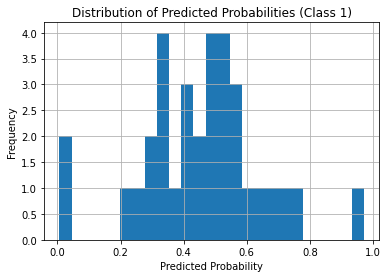

In [25]:
import matplotlib.pyplot as plt

# get y_probs and plot
y_probs = basic_model.predict_proba(test_pool)[:, 1]

plt.hist(y_probs, bins=25)
plt.title("Distribution of Predicted Probabilities (Class 1)")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [26]:
# 5. Set your custom positive threshold
custom_threshold = 0.8 # You can change this value

# 6. Predict probabilities and apply threshold
y_probs = basic_model.predict_proba(test_pool)[:, 1]
y_pred_custom = (y_probs >= custom_threshold).astype(int)

# 7. Evaluate
print(f"\nConfusion Matrix at threshold {custom_threshold}:")
print(confusion_matrix(y_test, y_pred_custom))
print(f"\nClassification Report at threshold {custom_threshold}:")
print(classification_report(y_test, y_pred_custom))


Confusion Matrix at threshold 0.8:
[[27  0]
 [ 5  1]]

Classification Report at threshold 0.8:
              precision    recall  f1-score   support

       False       0.84      1.00      0.92        27
        True       1.00      0.17      0.29         6

    accuracy                           0.85        33
   macro avg       0.92      0.58      0.60        33
weighted avg       0.87      0.85      0.80        33



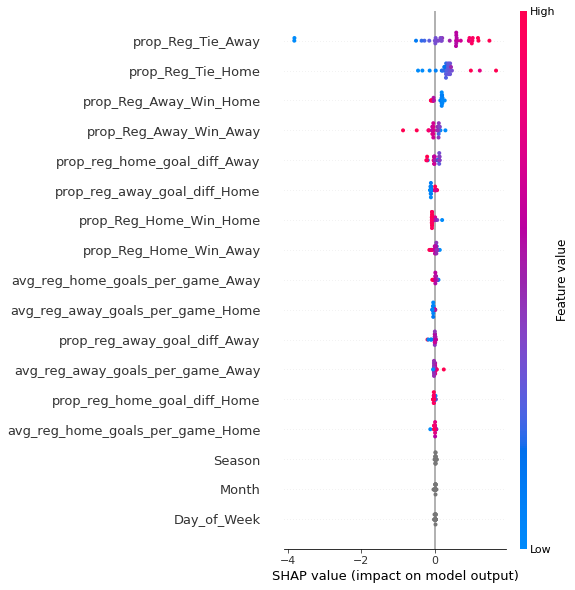

In [27]:
import numpy as np
import pandas as pd
import shap

# ---- Existing model training code remains unchanged ----

# 6. Get SHAP values from the model
shap_values = basic_model.get_feature_importance(
    data=test_pool,
    type='ShapValues'  # returns SHAP values + expected value
)

# 7. Extract feature names
feature_names = X_test.columns.tolist()

# 8. Create DataFrame for SHAP values (excluding last column which is base value)
shap_df = pd.DataFrame(shap_values[:, :-1], columns=feature_names)

# 9. Optional: Summary plot (global feature importance)
shap.summary_plot(shap_values[:, :-1], X_test, feature_names=feature_names)


In [28]:
# 10. Calculate mean absolute SHAP value for each feature
shap_mean_importance = shap_df.abs().mean().sort_values(ascending=False)

# 11. Display as DataFrame
shap_ranking_df = pd.DataFrame({
    'Feature': shap_mean_importance.index,
    'MeanAbsSHAP': shap_mean_importance.values
})

# update my code to show all rows of shap ranking df
pd.set_option('display.max_rows', None)

# Show top 20 most important features
print(shap_ranking_df.head(200))

                             Feature  MeanAbsSHAP
0                  prop_Reg_Tie_Away     0.756953
1                  prop_Reg_Tie_Home     0.422681
2             prop_Reg_Away_Win_Home     0.157327
3             prop_Reg_Away_Win_Away     0.134690
4       prop_reg_home_goal_diff_Away     0.083908
5       prop_reg_away_goal_diff_Home     0.075579
6             prop_Reg_Home_Win_Home     0.057994
7             prop_Reg_Home_Win_Away     0.051750
8   avg_reg_home_goals_per_game_Away     0.039361
9   avg_reg_away_goals_per_game_Home     0.029149
10      prop_reg_away_goal_diff_Away     0.027307
11  avg_reg_away_goals_per_game_Away     0.025538
12      prop_reg_home_goal_diff_Home     0.019344
13  avg_reg_home_goals_per_game_Home     0.018364
14                            Season     0.011830
15                             Month     0.009828
16                       Day_of_Week     0.007491


In [29]:
import joblib

# write model to pkl file
joblib.dump(basic_model, 'model/catboost_model_reg_tie.pkl')


['model/catboost_model_reg_tie.pkl']